## LIBRARIES

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
import nltk.corpus
from nltk.corpus import webtext
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

## EXERCISE 1 -- Word normalization

### 1. Import a sample web text (Firefox.txt)

In [2]:
text = webtext.raw("firefox.txt")

### 2. Display the vocabulary size

In [3]:
tok = word_tokenize(text)
print("Firefox vocabulary size:", len(set(tok)))

Firefox vocabulary size: 9300


### 3. Perform stemming on the text (Porter stemmer + Snowball stemmer)

In [4]:
stemer = PorterStemmer()
singles = [stemer.stem(t) for t in tok]

snowball = SnowballStemmer("english")
singles_ = [snowball.stem(t) for t in tok]

### 4. Display the vocabulary size

In [5]:
print("Porter stemmer vocabulary size:", len(set(singles)))

Porter stemmer vocabulary size: 5847


In [6]:
singles1=' '.join(tok)
singles1

"Cookie Manager : `` Do n't allow sites that set removed cookies to set future cookies '' should stay checked When in full screen mode Pressing Ctrl-N should open a new browser when only download dialog is left open add icons to context menu So called `` tab bar '' should be made a proper toolbar or given the ability collapse / expand . [ XUL ] Implement Cocoa-style toolbar customization . # ifdefs for MOZ_PHOENIX customize dialog 's toolbar has small icons when small icons is not checked nightly builds and tinderboxen for Phoenix finish tearing prefs UI to pieces and then make it not suck '' mozbrowser '' script does n't start correct binary Need bookmark groups icon Dropping at top of palette box horks things keyboard shortcut for Increase Text Size is broken default phoenix bookmarks [ cust ] need a toolbar spacer and spring spacer for customize Ca n't launch phoenix while Mozilla is running ( or vice versa ) separator not available when all toolbar items are in toolbar layout histo

In [7]:
singles1=' '.join(singles)
singles1

"cooki manag : `` do n't allow site that set remov cooki to set futur cooki '' should stay check when in full screen mode press ctrl-n should open a new browser when onli download dialog is left open add icon to context menu so call `` tab bar '' should be made a proper toolbar or given the abil collaps / expand . [ xul ] implement cocoa-styl toolbar custom . # ifdef for moz_phoenix custom dialog 's toolbar ha small icon when small icon is not check nightli build and tinderboxen for phoenix finish tear pref ui to piec and then make it not suck '' mozbrows '' script doe n't start correct binari need bookmark group icon drop at top of palett box hork thing keyboard shortcut for increas text size is broken default phoenix bookmark [ cust ] need a toolbar spacer and spring spacer for custom ca n't launch phoenix while mozilla is run ( or vice versa ) separ not avail when all toolbar item are in toolbar layout histori menu for the back button doe n't work attempt to open `` back button hist

In [8]:
print("Snowball stemmer vocabulary size:", len(set(singles_)))

Snowball stemmer vocabulary size: 5702


In [9]:
singles1=' '.join(singles_)
singles1

"cooki manag : `` do n't allow site that set remov cooki to set futur cooki '' should stay check when in full screen mode press ctrl-n should open a new browser when onli download dialog is left open add icon to context menu so call `` tab bar '' should be made a proper toolbar or given the abil collaps / expand . [ xul ] implement cocoa-styl toolbar custom . # ifdef for moz_phoenix custom dialog 's toolbar has small icon when small icon is not check night build and tinderboxen for phoenix finish tear pref ui to piec and then make it not suck '' mozbrows '' script doe n't start correct binari need bookmark group icon drop at top of palett box hork thing keyboard shortcut for increas text size is broken default phoenix bookmark [ cust ] need a toolbar spacer and spring spacer for custom ca n't launch phoenix while mozilla is run ( or vice versa ) separ not avail when all toolbar item are in toolbar layout histori menu for the back button doe n't work attempt to open `` back button histo

### 5. Import the stop-words module, and list them

In [10]:
stopwords = nltk.corpus.stopwords.words('english')

In [11]:
singles1=' '.join(stopwords)
singles1

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"

### 6. Remove the stop-words from the text

In [12]:
list1 = [x for x in tok if x not in stopwords]

In [13]:
singles1=' '.join(list1)
singles1

"Cookie Manager : `` Do n't allow sites set removed cookies set future cookies '' stay checked When full screen mode Pressing Ctrl-N open new browser download dialog left open add icons context menu So called `` tab bar '' made proper toolbar given ability collapse / expand . [ XUL ] Implement Cocoa-style toolbar customization . # ifdefs MOZ_PHOENIX customize dialog 's toolbar small icons small icons checked nightly builds tinderboxen Phoenix finish tearing prefs UI pieces make suck '' mozbrowser '' script n't start correct binary Need bookmark groups icon Dropping top palette box horks things keyboard shortcut Increase Text Size broken default phoenix bookmarks [ cust ] need toolbar spacer spring spacer customize Ca n't launch phoenix Mozilla running ( vice versa ) separator available toolbar items toolbar layout history menu back buttons n't work attempting open `` back button history menu '' second window generates another back button toolbar Phoenix Mozilla comfortably share source

In [14]:
len(set(list1))

9187

### 7. Display the vocabulary size

In [15]:
print("Vocabulary size with stopwords removed:", len(set(list1)))

Vocabulary size with stopwords removed: 9187


### 8. Create your own stop-word, append to the stop-words list, and apply it

In [16]:
new_word = [".", "'", ";", ",", ":", "n't", '"', "``", "(" , ")"]
new_stopwords_list = stopwords + new_word

In [17]:
print(new_stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
text_without_stopwords = [x for x in tok if x not in new_stopwords_list]
print(len(set(text_without_stopwords)))

9179


In [19]:
singles1=' '.join(text_without_stopwords)
singles1

"Cookie Manager Do allow sites set removed cookies set future cookies '' stay checked When full screen mode Pressing Ctrl-N open new browser download dialog left open add icons context menu So called tab bar '' made proper toolbar given ability collapse / expand [ XUL ] Implement Cocoa-style toolbar customization # ifdefs MOZ_PHOENIX customize dialog 's toolbar small icons small icons checked nightly builds tinderboxen Phoenix finish tearing prefs UI pieces make suck '' mozbrowser '' script start correct binary Need bookmark groups icon Dropping top palette box horks things keyboard shortcut Increase Text Size broken default phoenix bookmarks [ cust ] need toolbar spacer spring spacer customize Ca launch phoenix Mozilla running vice versa separator available toolbar items toolbar layout history menu back buttons work attempting open back button history menu '' second window generates another back button toolbar Phoenix Mozilla comfortably share source tree Phoenix forgets cookies even 

### 9. Calculate the frequency distribution of words, and show them using a wordcloud

In [20]:
from collections import Counter
# Count how many times each word appears in the text
counts = Counter(text_without_stopwords)

In [21]:
top30 = counts.most_common(30)
top30 = dict(top30)
print(top30)

{"''": 1330, 'page': 709, 'Firefox': 595, 'window': 572, 'open': 458, 'menu': 457, 'bar': 444, 'tab': 437, 'Firebird': 433, 'new': 423, 'work': 413, 'toolbar': 360, 'button': 353, 'browser': 343, 'bookmarks': 342, 'dialog': 325, 'bookmark': 321, '>': 313, 'file': 305, 'URL': 293, 'crashes': 290, 'download': 288, 'I': 285, 'text': 268, 'crash': 258, '-': 250, 'tabs': 242, 'Bookmarks': 241, 'link': 237, 'manager': 228}


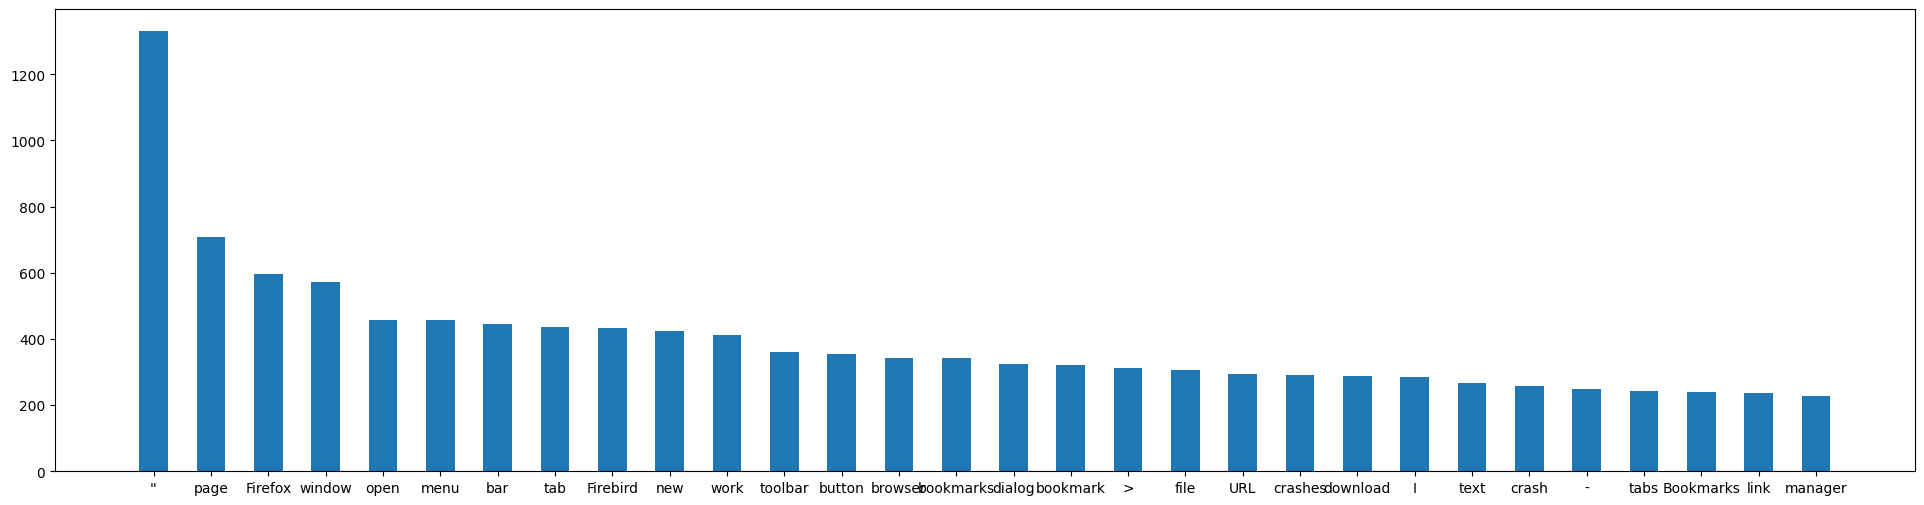

In [22]:
plt.figure(figsize=(24,6))
plt.bar(top30.keys(), top30.values(), width=0.5)
plt.show()

In [23]:
from wordcloud import WordCloud
text=' '.join(text_without_stopwords)
wordcloud=WordCloud(background_color='white',max_words=300,).generate(text)

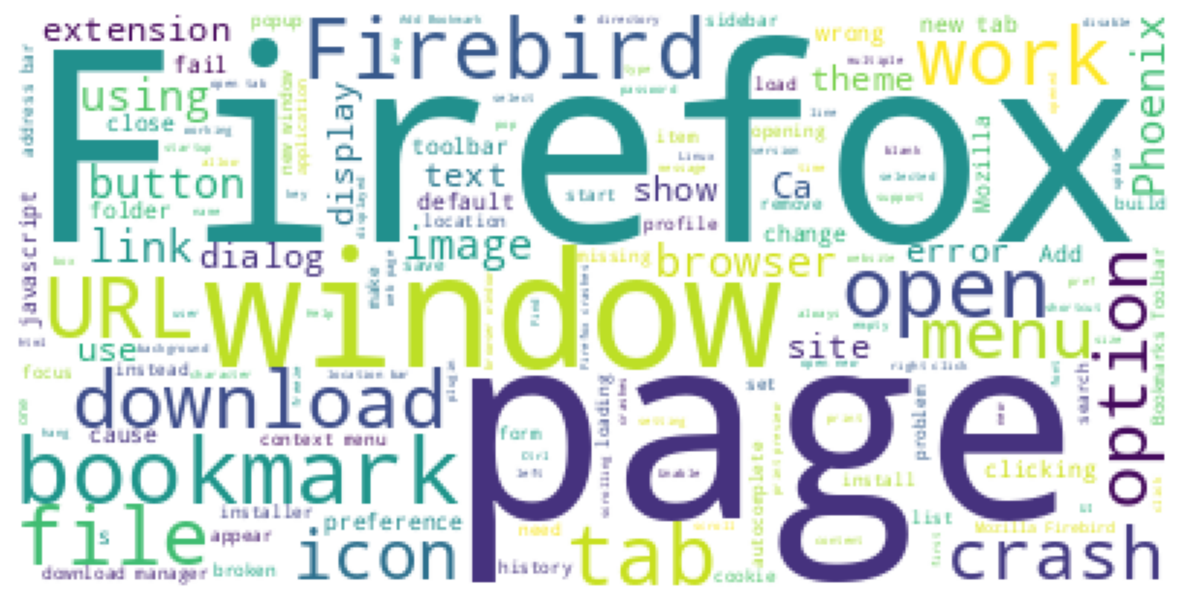

In [24]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

---

---

## Exercise II – POS tagging

### 1. Import auxiliary functions, and open The Treebank Corpus

In [25]:
treebank = nltk.corpus.treebank

### 2. Extract the features using the function ufeatures

In [26]:
def ufeatures(utt, idx):
    ftdist = {}
    ftdist['word'] = utt[idx]
    ftdist['word_len'] = len(utt)
    ftdist['dist_from_first'] = idx - 0
    ftdist['dist_from_last'] = len(utt) - idx
    ftdist['capitalized'] = utt[idx][0].upper() == utt[idx][0]
    ftdist['prefix1'] = utt[idx][0]
    ftdist['prefix2'] = utt[idx][:2]
    ftdist['prefix3'] = utt[idx][:3]
    ftdist['suffix1'] = utt[idx][-1]
    ftdist['suffix2'] = utt[idx][-2:]
    ftdist['suffix3'] = utt[idx][-3:]
    ftdist['prev_word'] = '' if idx==0 else utt[idx-1]
    ftdist['next_word'] = '' if idx==(len(utt)-1) else utt[idx+1]
    ftdist['numeric'] = utt[idx].isdigit()
    return ftdist

### 3. Use the tagged sentences (universal tag set) for the ground-truth

In [27]:
X =[]
Y =[]

for sentence in treebank.tagged_words(tagset="universal"):
    x = sentence[0]
    y = sentence[1]
    X.append(x)
    Y.append(y)
    print(' '.join(sentence))

Streaming output truncated to the last 5000 lines.
, .
D.C. NOUN
, .
by ADP
one NUM
of ADP
Wedtech NOUN
's PRT
principals NOUN
*T*-2 X
, .
he PRON
tells VERB
the DET
reader NOUN
, .
`` .
*-5 X
mindful ADJ
of ADP
* X
accepting VERB
anything NOUN
of ADP
value NOUN
from ADP
those DET
0 X
I PRON
was VERB
writing VERB
about ADP
*T*-1 X
, .
I PRON
declined VERB
. .
'' .
Any DET
question NOUN
as ADP
to PRT
why ADV
an DET
author NOUN
would VERB
believe VERB
0 X
this DET
plaintive ADJ
, .
high-minded ADJ
note NOUN
of ADP
assurance NOUN
is VERB
necessary ADJ
*T*-2 X
is VERB
answered VERB
*-1 X
by ADP
* X
reading VERB
this DET
book NOUN
about ADP
sticky ADJ
fingers NOUN
and CONJ
sweaty ADJ
scammers NOUN
. .
Bribe NOUN
by ADP
bribe NOUN
, .
Mr. NOUN
Sternberg NOUN
and CONJ
his PRON
co-author NOUN
, .
Matthew NOUN
C. NOUN
Harrison NOUN
Jr. NOUN
, .
lead VERB
us PRON
along ADP
the DET
path NOUN
0 X
Wedtech NOUN
traveled VERB
*T*-1 X
, .
from ADP
its PRON
inception NOUN
as ADP
a DET
small ADJ
manufac

### 4. Split the corpus into train and test subsets

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [29]:
def convert_to_features(x):
    return [ufeatures(x, i) for i in range(len(x))]

In [30]:
X_train = convert_to_features(x_train)
X_test = convert_to_features(x_test)

In [31]:
print(X_train[0])

{'word': 'delivery', 'word_len': 90608, 'dist_from_first': 0, 'dist_from_last': 90608, 'capitalized': False, 'prefix1': 'd', 'prefix2': 'de', 'prefix3': 'del', 'suffix1': 'y', 'suffix2': 'ry', 'suffix3': 'ery', 'prev_word': '', 'next_word': "'s", 'numeric': False}


In [32]:
summary = set(y_train)
print(summary)

{'NOUN', 'ADP', '.', 'PRT', 'CONJ', 'VERB', 'ADV', 'ADJ', 'X', 'NUM', 'PRON', 'DET'}


### 5. Create a Random Forest classifier, and fit it using the train subset

In [33]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier

vectorizer = DictVectorizer()
X_train_numerical = vectorizer.fit_transform(X_train)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train_numerical, y_train)

RandomForestClassifier(random_state=42)

In [34]:
print(X_train_numerical[0])

  (0, 0)	0.0
  (0, 1)	0.0
  (0, 2)	90608.0
  (0, 22)	1.0
  (0, 11756)	0.0
  (0, 11811)	1.0
  (0, 12421)	1.0
  (0, 14843)	1.0
  (0, 15815)	1.0
  (0, 27640)	1.0
  (0, 28231)	1.0
  (0, 29777)	1.0
  (0, 36937)	1.0
  (0, 42526)	90608.0


In [35]:
(X_train_numerical)

<90608x42527 sparse matrix of type '<class 'numpy.float64'>'
	with 1268512 stored elements in Compressed Sparse Row format>

### 6. Predict the tags of the test subset

In [36]:
X_test_ = vectorizer.transform(X_test)

ypred = clf.predict(X_test_)

In [37]:
for i in range(10):
    print("")
    print(i)
    print("Word: ", x_test[i])
    print("Real label: ", y_test[i])
    print("Predicted label: ", ypred[i])


0
Word:  Nixon
Real label:  NOUN
Predicted label:  NOUN

1
Word:  ,
Real label:  .
Predicted label:  .

2
Word:  0
Real label:  X
Predicted label:  X

3
Word:  U.S.
Real label:  NOUN
Predicted label:  NOUN

4
Word:  .
Real label:  .
Predicted label:  .

5
Word:  as
Real label:  ADP
Predicted label:  ADP

6
Word:  Grain
Real label:  NOUN
Predicted label:  NOUN

7
Word:  face
Real label:  VERB
Predicted label:  NOUN

8
Word:  $
Real label:  .
Predicted label:  .

9
Word:  or
Real label:  CONJ
Predicted label:  CONJ


### 7. Calculate the performance of the POS tagger

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')
conf_matrix = confusion_matrix(y_test, ypred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))



Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


In [42]:
from collections import Counter
# Count how many times each word appears in the text
counts = Counter(y_test)
print(counts)

Counter({'NOUN': 2908, 'VERB': 1325, '.': 1167, 'ADP': 1024, 'DET': 883, 'X': 653, 'ADJ': 619, 'NUM': 357, 'ADV': 327, 'PRT': 303, 'CONJ': 262, 'PRON': 240})


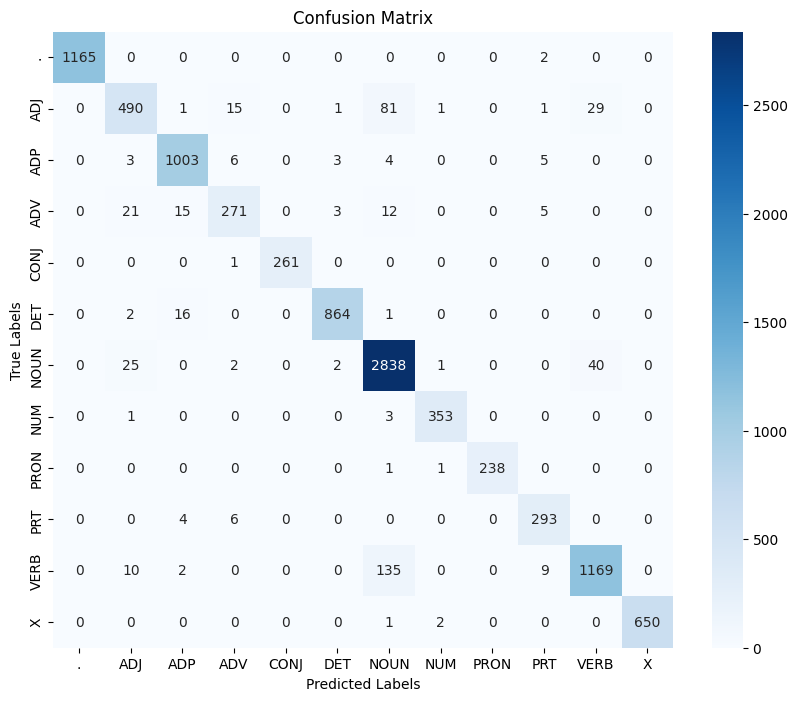

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

classes = ['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### 8. Show the top features of the model

In [41]:
feature_importances = clf.feature_importances_

feature_names = vectorizer.get_feature_names_out()

feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_5 = 5
print("Top", top_5, "features:")
for feature, importance in sorted_feature_importance[:top_5]:
    print(feature, ":", importance)

Top 5 features:
prefix1=* : 0.0184678011984706
suffix1=d : 0.011139685812226716
prefix2=th : 0.011049979213482641
suffix3=the : 0.010701634761234454
capitalized : 0.010620055195144444
